###  module 28 : 強化學習 :初始化Q-table 
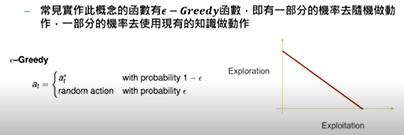
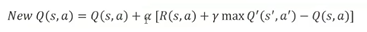

In [7]:
"""
A simple example for Reinforcement Learning using table lookup Q-learning method.
An agent "o" is on the left of a 1 dimensional world, the treasure is on the rightmost location.
Run this program and to see how the agent will improve its strategy of finding the treasure.
View more on my tutorial page: https://morvanzhou.github.io/tutorials/
"""

import numpy as np
import pandas as pd
import time

np.random.seed(2)  # reproducible

# 𝑁𝑒𝑤𝑄𝑠,𝑎=𝑄𝑠,𝑎+𝛼[𝑅𝑠,𝑎+𝛾max𝑄′𝑠′,𝑎′−𝑄(𝑠,𝑎)]
N_STATES = 6                      # the length of the 1 dimensional world
ACTIONS = ['left', 'right']       # available actions
EPSILON = 0.9   # greedy police　　(𝝐−𝑮𝒓𝒆𝒆𝒅𝒚 函數)
ALPHA = 0.1     # learning rate   (上述公式中的𝛼)
GAMMA = 0.9     # discount factor (𝛾 折現因子)
MAX_EPISODES = 13   # maximum episodesˋɛpə͵sod  1集(玩13次遊戲)
FRESH_TIME = 0.3    # fresh time for one move


def build_q_table(n_states, actions):  # n個狀態的row，action 狀態的columns
    table = pd.DataFrame(
        np.zeros((n_states, len(actions))),     # q_table initial values
        columns=actions,    # actions's name
    )
    # print(table)    # show table
    return table


### Q-learning基礎範例

In [5]:
import numpy as np
A=np.random.uniform()  # low default =0 ，high default =1  (includes low, but excludes high).
print(A)

0.34966443129217695


In [8]:

def choose_action(state, q_table):
    # This is how to choose an action
    state_actions = q_table.iloc[state, :]
    if (np.random.uniform() > EPSILON) or ((state_actions == 0).all()):  # act non-greedy or state-action have no value
        action_name = np.random.choice(ACTIONS) # 隨機作決策
    else:   # act greedy
        # replace argmax to idxmax as argmax means a different function in newer version of pandas
        action_name = state_actions.idxmax()   # 依據現有的q_table 做決策
    return action_name


def get_env_feedback(S, A):  # 給現在的state & 要做的動作
    # This is how agent will interact with the environment
    if A == 'right':    # move right
        if S == N_STATES - 2:   # terminate
            S_ = 'terminal'
            R = 1
        else:
            S_ = S + 1
            R = 0
    else:   # move left
        R = 0
        if S == 0:
            S_ = S  # reach the wall
        else:
            S_ = S - 1
    return S_, R #新的state 給你，和賞酬


def update_env(S, episode, step_counter):  # o 跑來跑去
    # This is how environment be updated
    env_list = ['-']*(N_STATES-1) + ['T']   # '---------T' our environment
    if S == 'terminal':
        interaction = 'Episode %s: total_steps = %s' % (episode+1, step_counter)
        print('\r{}'.format(interaction), end='')
        time.sleep(2)
        print('\r                                ', end='')
    else:
        env_list[S] = 'o'
        interaction = ''.join(env_list)
        print('\r{}'.format(interaction), end='')
        time.sleep(FRESH_TIME)

### 主程式
def rl():
    # main part of RL loop
    q_table = build_q_table(N_STATES, ACTIONS)
    for episode in range(MAX_EPISODES):
        step_counter = 0
        S = 0
        is_terminated = False
        update_env(S, episode, step_counter)
        while not is_terminated:

            A = choose_action(S, q_table)
            S_, R = get_env_feedback(S, A)  # take action & get next state and reward
            q_predict = q_table.loc[S, A]
            if S_ != 'terminal':
                q_target = R + GAMMA * q_table.iloc[S_, :].max()   # next state is not terminal
            else:
                q_target = R     # next state is terminal
                is_terminated = True    # terminate this episode

            q_table.loc[S, A] += ALPHA * (q_target - q_predict)  # update
            S = S_  # move to next state

            update_env(S, episode, step_counter+1)
            step_counter += 1
    return q_table


q_table = rl()
print('\r\nQ-table:\n')
print(q_table)

                                
Q-table:

       left     right
0  0.000000  0.004320
1  0.000000  0.025005
2  0.000030  0.111241
3  0.000000  0.368750
4  0.027621  0.745813
5  0.000000  0.000000


# Q-learning進階範例 

In [9]:
from __future__ import print_function
import numpy as np
import time
from env import Env


EPSILON = 0.1
ALPHA = 0.1
GAMMA = 0.9
MAX_STEP = 30

np.random.seed(0)

def epsilon_greedy(Q, state):
    if (np.random.uniform() > 1 - EPSILON) or ((Q[state, :] == 0).all()):
        action = np.random.randint(0, 4)  # 0~3
    else:
        action = Q[state, :].argmax()
    return action


e = Env()
Q = np.zeros((e.state_num, 4)) # 初始化q table

for i in range(50):
    e = Env()
    while (e.is_end is False) and (e.step < MAX_STEP):
        action = epsilon_greedy(Q, e.present_state)
        state = e.present_state
        reward = e.interact(action)
        new_state = e.present_state
        Q[state, action] = (1 - ALPHA) * Q[state, action] + \
            ALPHA * (reward + GAMMA * Q[new_state, :].max())
        e.print_map()
        time.sleep(0.1)
    print('Episode:', i, 'Total Step:', e.step, 'Total Reward:', e.total_reward)
    time.sleep(2)

.........
.       .
.A    o .
.       .
.........
.........
.       .
. A   o .
.       .
.........
.........
.       .
.     o .
. A     .
.........
.........
.       .
.     o .
.A      .
.........
.........
.       .
.     o .
.A      .
.........
.........
.       .
.A    o .
.       .
.........
.........
.       .
.A    o .
.       .
.........
.........
.       .
.A    o .
.       .
.........
.........
.       .
.     o .
.A      .
.........
.........
.       .
.A    o .
.       .
.........
.........
.       .
. A   o .
.       .
.........
.........
.       .
.     o .
. A     .
.........
.........
.       .
.     o .
.  A    .
.........
.........
.       .
.     o .
.   A   .
.........
.........
.       .
.     o .
.    A  .
.........
.........
.       .
.     o .
.     A .
.........
.........
.       .
.     A .
.       .
.........
Episode: 0 Total Step: 17 Total Reward: 100
.........
.       .
.A    o .
.       .
.........
.........
.       .
. A   o .
.       .
.........
......

.........
.       .
.  A  o .
.       .
.........
.........
.  A    .
.     o .
.       .
.........
.........
. A     .
.     o .
.       .
.........
.........
.       .
. A   o .
.       .
.........
Episode: 6 Total Step: 30 Total Reward: 0
.........
. A     .
.     o .
.       .
.........
.........
.       .
. A   o .
.       .
.........
.........
.       .
.A    o .
.       .
.........
.........
.       .
. A   o .
.       .
.........
.........
. A     .
.     o .
.       .
.........
.........
.  A    .
.     o .
.       .
.........
.........
. A     .
.     o .
.       .
.........
.........
.A      .
.     o .
.       .
.........
.........
.A      .
.     o .
.       .
.........
.........
.A      .
.     o .
.       .
.........
.........
.       .
.A    o .
.       .
.........
.........
.       .
.     o .
.A      .
.........
.........
.       .
.     o .
. A     .
.........
.........
.       .
. A   o .
.       .
.........
.........
. A     .
.     o .
.       .
.........
........

.........
.       .
.     o .
. A     .
.........
.........
.       .
.     o .
.A      .
.........
.........
.       .
.A    o .
.       .
.........
.........
.       .
.A    o .
.       .
.........
.........
.       .
. A   o .
.       .
.........
.........
.       .
.A    o .
.       .
.........
.........
.       .
.A    o .
.       .
.........
.........
.       .
.     o .
.A      .
.........
.........
.       .
.     o .
.A      .
.........
.........
.       .
.A    o .
.       .
.........
.........
.A      .
.     o .
.       .
.........
.........
.       .
.A    o .
.       .
.........
.........
.       .
.A    o .
.       .
.........
.........
.       .
. A   o .
.       .
.........
.........
. A     .
.     o .
.       .
.........
.........
.A      .
.     o .
.       .
.........
Episode: 13 Total Step: 30 Total Reward: 0
.........
.A      .
.     o .
.       .
.........
.........
. A     .
.     o .
.       .
.........
.........
. A     .
.     o .
.       .
.........
.......

.........
.   A   .
.     o .
.       .
.........
.........
.    A  .
.     o .
.       .
.........
.........
.     A .
.     o .
.       .
.........
.........
.       .
.     A .
.       .
.........
Episode: 29 Total Step: 8 Total Reward: 100
.........
. A     .
.     o .
.       .
.........
.........
.  A    .
.     o .
.       .
.........
.........
.   A   .
.     o .
.       .
.........
.........
.    A  .
.     o .
.       .
.........
.........
.     A .
.     o .
.       .
.........
.........
.       .
.     A .
.       .
.........
Episode: 30 Total Step: 6 Total Reward: 100
.........
. A     .
.     o .
.       .
.........
.........
.  A    .
.     o .
.       .
.........
.........
.   A   .
.     o .
.       .
.........
.........
.    A  .
.     o .
.       .
.........
.........
.     A .
.     o .
.       .
.........
.........
.       .
.     A .
.       .
.........
Episode: 31 Total Step: 6 Total Reward: 100
.........
. A     .
.     o .
.       .
.........
.........
.       

In [10]:
print(Q)
# 程式中使用的 遊戲的細節function 在env.py

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.06123616e-03 0.00000000e+00 8.03903195e-01 1.10823249e+01]
 [1.07384089e+00 0.00000000e+00 8.60631099e-01 2.18459389e+01]
 [4.92673895e-01 0.00000000e+00 1.53071148e-01 3.86398801e+01]
 [0.00000000e+00 2.26800000e-01 5.17640133e-02 5.91753877e+01]
 [0.00000000e+00 0.00000000e+00 5.11691124e-01 8.06732426e+01]
 [1.25246415e+01 9.79724440e+01 0.00000000e+00 0.000000